# Linear Search

In [1]:
def search_linear(arr, q):
    for i, j in enumerate(arr):
        if (j == q):
            return (i, q)
    return (-1, q)

In [2]:
import random

arr = list(range(1, 101))
random.shuffle(arr)

f = search_linear(arr, 4)
print(f)

(75, 4)


$$\log (n) \leq n$$

$$O(\log _2(n)) \leq O(n)$$

---

$$n = 1; \ \log _2(n) = 0$$

$$n = 2; \ \log _2(n) = 1$$

$$n = 4; \ \log _2(n) = 2$$

$$n = 8; \ \log _2(n) = 3$$

$$n = 16; \ \log _2(n) = 4$$

$$\dots$$

$$n = 1024; \ \log _2(n) = 10$$

# Binary Search

In [3]:
def binary_search(arr, left, right, q):
    mid = round((left + right) / 2)
    
    try:
        if (arr[mid] == q):
            return (mid, q)

        elif (arr[mid] > q):
            return binary_search(arr, left, mid, q)

        elif (arr[mid] < q):
            return binary_search(arr, mid, right, q)
    
    except RecursionError as r:
        return (-1, q)

In [4]:
arr = [2, 3, 4, 10, 40, 43, 45, 46]
left = 0
right = len(arr) - 1
q = 3

f = binary_search(arr=arr, left=left, right=right, q=q)
print(f)

(1, 3)


# Find Common in two

* Time → $O(M*N)$
* Space → $O(1)$

In [5]:
import random

set1 = list(set([random.randint(1, 100) for i in range(20)]))
set2 = list(set([random.randint(1, 100) for i in range(20)]))

print(set1)
print(set2)

[32, 97, 34, 98, 100, 69, 9, 75, 78, 15, 47, 81, 50, 25, 58, 60, 30]
[100, 38, 39, 73, 14, 48, 49, 82, 23, 54, 22, 90, 61, 30, 63]


In [6]:
def find_common1(set1, set2):
    common = [i for j in set2 for i in set1 if i == j]
    return common

In [7]:
common = find_common1(set1=set1, set2=set2)
print(common)

[100, 30]


* Time → $O(M + N)$
* Space → $O(M)$

In [8]:
def find_common2(set1, set2):
    set2_hashed = {i : 1 for i in set2}
    common = [i for i in set1 if i in set2_hashed]
    return common

In [9]:
common = find_common2(set1=set1, set2=set2)
print(common)

[100, 30]


Optimized code

In [10]:
find_common3 = lambda set1, set2: list(set(set1).intersection(set(set2)))

In [11]:
common = find_common3(set1=set1, set2=set2)
print(common)

[100, 30]


# Code Performance

In [12]:
import random
from timeit import timeit

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

def time_convertor(val, time_type):
    if time_type == 'µs':
        val = val / 1000000
    elif time_type == 'ms':
        val = val / 1000
    else:
        val = val
    return val

def compare_performace():
    r = [10, 30, 50, 100, 500, 1000, 1500]
    X = []; Y1 = []; Y2 = []; Y3 = []
    
    for i in range(len(r)):
        set1 = list(set([random.randint(1, 100) for i in range(r[i])]))
        set2 = list(set([random.randint(1, 100) for i in range(r[i])]))
        
        x_val = "{}".format(r[i])
        X.append(x_val)
        
        y_val_1 = %timeit -o find_common1(set1=set1, set2=set2)
        y_val_2 = %timeit -o find_common2(set1=set1, set2=set2)
        y_val_3 = %timeit -o find_common3(set1=set1, set2=set2)
        print('---------')
        
        y_val_1 = str(y_val_1).split(' ', 2)
        y_val_2 = str(y_val_2).split(' ', 2)
        y_val_3 = str(y_val_3).split(' ', 2)
        
        y_val_1 = time_convertor(val=float(y_val_1[0]), time_type=y_val_1[1])
        y_val_2 = time_convertor(val=float(y_val_2[0]), time_type=y_val_2[1])
        y_val_3 = time_convertor(val=float(y_val_3[0]), time_type=y_val_3[1])
        
        Y1.append(y_val_1)
        Y2.append(y_val_2)
        Y3.append(y_val_3)
    
    plt.figure(figsize=(15, 8))
    plt.plot(X, Y1, '-o', label='Normal function')
    plt.plot(X, Y2, '-o', label='List comprehension')
    plt.plot(X, Y3, '-o', label='Lambda function')
    plt.xlabel('Array size')
    plt.ylabel('Function performance')
    plt.legend()
    plt.show()

5.38 µs ± 627 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.9 µs ± 42.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.81 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
---------
28.7 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
6.83 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.2 µs ± 599 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
---------
60.4 µs ± 3.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8.53 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.49 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
---------
152 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8.54 µs ± 667 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.62 µs ± 516 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
---------
377 µs ± 40.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

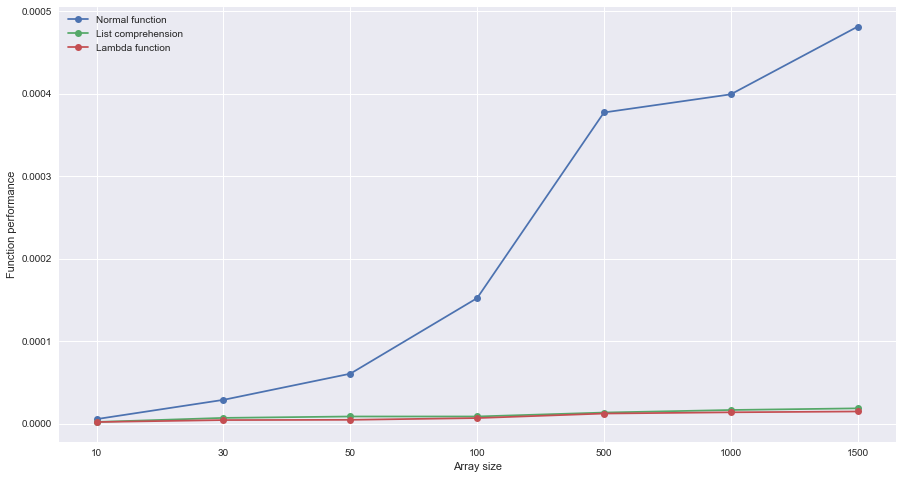

In [13]:
compare_performace()